# simpful library example
# Fuzzy sytem to tipping problem

## 1 - Using Sugeno model

In [1]:
import simpful as sf

system = sf.FuzzySystem()
set_evaluations = sf.AutoTriangle(3, terms=['poor', 'average', 'good'], universe_of_discourse=[0,10])
system.add_linguistic_variable("service", set_evaluations)
system.add_linguistic_variable("quality", set_evaluations)

system.set_crisp_output_value("low", 5)
system.set_crisp_output_value("medium", 15)
system.set_output_function("high", "service+quality+5")

system.add_rules([
    "IF (quality IS poor) OR (service IS poor) THEN (Tip IS low)",
    "IF (service IS average) THEN (Tip IS medium)",
    "IF (quality IS good) OR (quality IS good) THEN (Tip IS medium)"
])

system.set_variable("quality", 6.5)
system.set_variable("service", 9.8)

tip = system.Sugeno_inference()["Tip"]
print("Sugeno: ", tip)

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.4.5 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

 * Detected Sugeno model type
Sugeno:  15.0


## 2 - Using Mamdani model

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.4.5 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

Mandani:  14.727022885709754


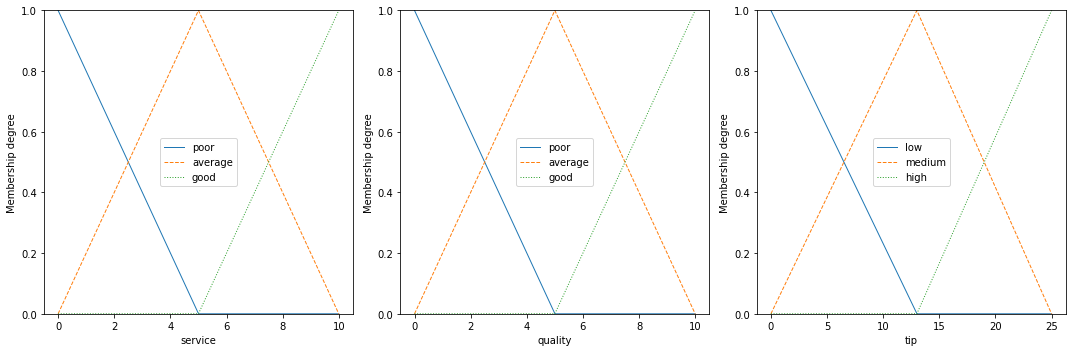

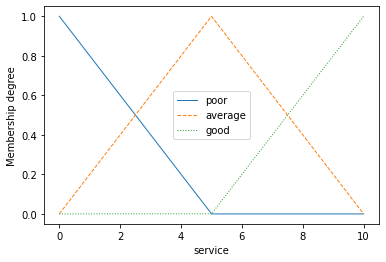

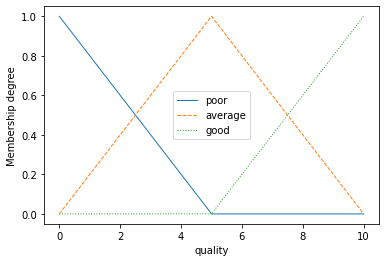

AttributeError: 'TriangleFuzzySet' object has no attribute 'plot'

In [7]:
system2 = sf.FuzzySystem(operators=['AND_PRODUCT'])
set_evaluations_service = sf.AutoTriangle(3, terms=['poor', 'average', 'good'], universe_of_discourse=[0,10])
set_evaluations_quality = sf.AutoTriangle(3, terms=['poor', 'average', 'good'], universe_of_discourse=[0,10])
system2.add_linguistic_variable("service", set_evaluations_service)
system2.add_linguistic_variable("quality", set_evaluations_quality)

tip_low = sf.TriangleFuzzySet(0, 0, 13, term="low")
tip_medium = sf.TriangleFuzzySet(0, 13, 25, term="medium")
tip_high = sf.TriangleFuzzySet(13, 25, 25, term="high")
system2.add_linguistic_variable("tip", sf.LinguisticVariable([tip_low, tip_medium, tip_high], universe_of_discourse=[0, 25]))

system2.add_rules([
    "IF (quality IS poor) OR (service IS poor) THEN (tip IS low)",
    "IF (service IS average) THEN (tip IS medium)",
    "IF (quality IS good) OR (quality IS good) THEN (tip IS high)"
])

system2.set_variable("quality", 8)
system2.set_variable("service", 8)

tip = system2.inference()['tip']
print("Mandani: ",tip)

system2.produce_figure()
system2.plot_variable('service')
system2.plot_variable('quality')